In [18]:
from torch_geometric.datasets import Planetoid#下载数据集用的
from torch_geometric.transforms import NormalizeFeatures
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

In [25]:
# 可视化部分
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [19]:
dataset = Planetoid(root='C:/folder/code/jupyter/PyG/data', name='Cora', transform=NormalizeFeatures())#transform预处理
print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')


Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7


In [20]:
data=dataset[0]
print(data)
print('===========================================================================================================')

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [21]:
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(17)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

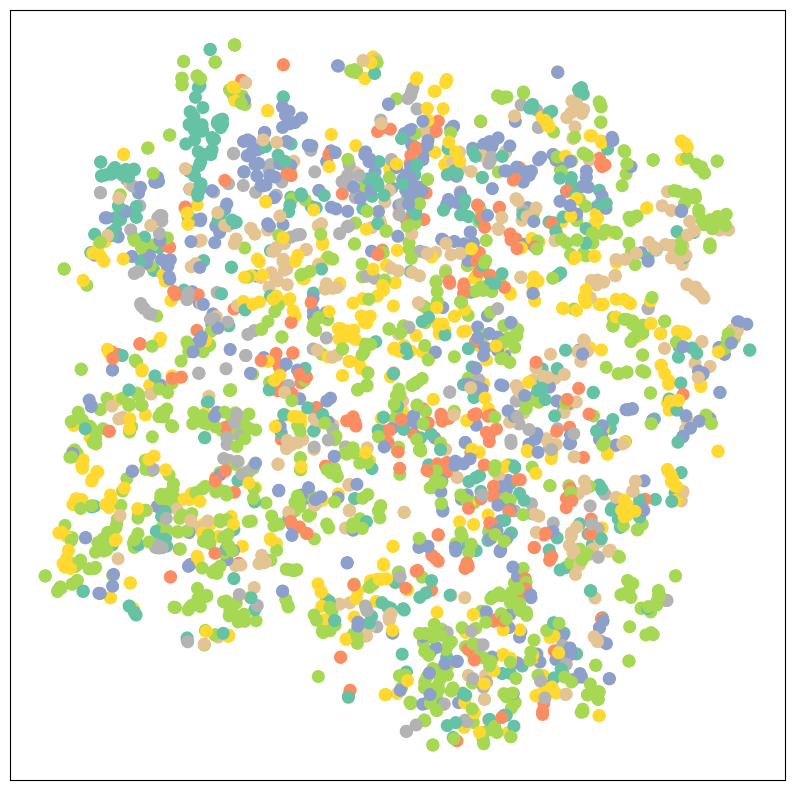

In [26]:
model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [27]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

In [28]:
def train():
    model.train()
    optimizer.zero_grad()  
    out = model(data.x, data.edge_index)  
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  
    loss.backward() 
    optimizer.step()  
    return loss

In [29]:
def test():
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)  
    test_correct = pred[data.test_mask] == data.y[data.test_mask]  
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  
    return test_acc

In [30]:
for epoch in range(1, 101):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

Epoch: 001, Loss: 1.9459
Epoch: 002, Loss: 1.9402
Epoch: 003, Loss: 1.9353
Epoch: 004, Loss: 1.9287
Epoch: 005, Loss: 1.9216
Epoch: 006, Loss: 1.9147
Epoch: 007, Loss: 1.9053
Epoch: 008, Loss: 1.8944
Epoch: 009, Loss: 1.8855
Epoch: 010, Loss: 1.8758
Epoch: 011, Loss: 1.8577
Epoch: 012, Loss: 1.8593
Epoch: 013, Loss: 1.8407
Epoch: 014, Loss: 1.8383
Epoch: 015, Loss: 1.8168
Epoch: 016, Loss: 1.7882
Epoch: 017, Loss: 1.7755
Epoch: 018, Loss: 1.7776
Epoch: 019, Loss: 1.7649
Epoch: 020, Loss: 1.7322
Epoch: 021, Loss: 1.7308
Epoch: 022, Loss: 1.7095
Epoch: 023, Loss: 1.6885
Epoch: 024, Loss: 1.6746
Epoch: 025, Loss: 1.6509
Epoch: 026, Loss: 1.6296
Epoch: 027, Loss: 1.6205
Epoch: 028, Loss: 1.6105
Epoch: 029, Loss: 1.5445
Epoch: 030, Loss: 1.5655
Epoch: 031, Loss: 1.5458
Epoch: 032, Loss: 1.5179
Epoch: 033, Loss: 1.5103
Epoch: 034, Loss: 1.4726
Epoch: 035, Loss: 1.4184
Epoch: 036, Loss: 1.4309
Epoch: 037, Loss: 1.4067
Epoch: 038, Loss: 1.3436
Epoch: 039, Loss: 1.3712
Epoch: 040, Loss: 1.3668


In [31]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.8110


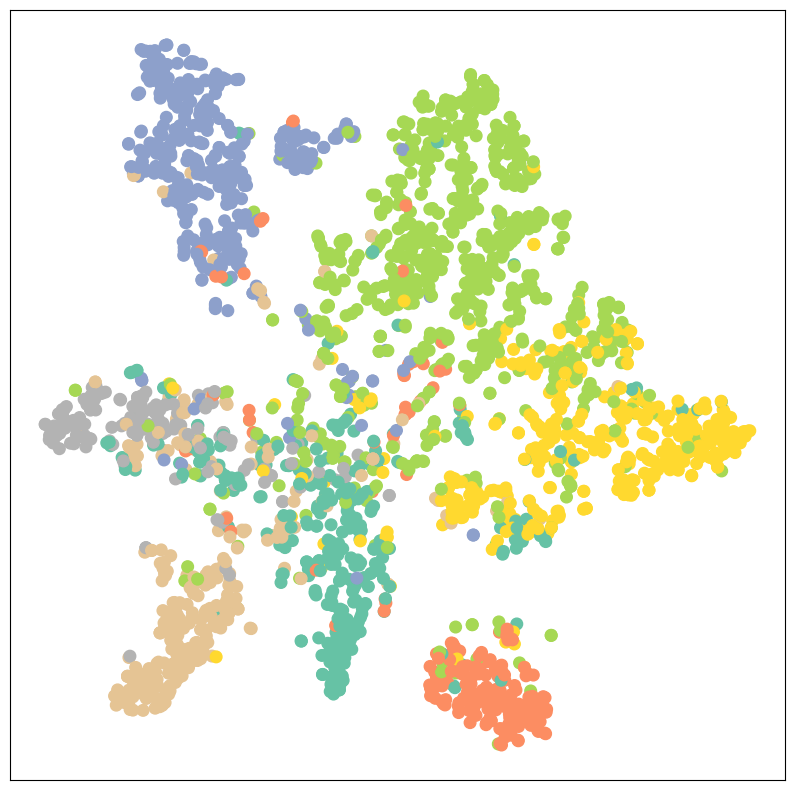

In [32]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)